In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import imageio
import trendln as tr

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
tr.VERSION

'1.11'

In [2]:
data=pd.read_csv("data/EURUSD_M15.csv",names=["date","hour","Open","High","Low","Close"], index_col=False)
data["Date"]=pd.to_datetime(data['date'] + ' ' + data['hour'])
data=data.drop(['date', 'hour'], axis=1)
data=data.set_index("Date")
data.tail()

,Open,High,Low,Close
Date,,,,
2019-11-22 20:45:00,1.10216,1.10228,1.10206,1.10226
2019-11-22 21:00:00,1.10227,1.10230,1.10217,1.10219
2019-11-22 21:15:00,1.10219,1.10223,1.10208,1.10210
2019-11-22 21:30:00,1.10210,1.10213,1.10196,1.10197
2019-11-22 21:45:00,1.10198,1.10207,1.10159,1.10160


In [3]:
len(data)

9904

In [ ]:

def plot_for_offset(big, size):
    # Data for plotting
    fig = tr.plot_sup_res_date(data[big:big+size].Close, data[big:big+size].index) 

    # Used to return the plot as an image rray
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image
plt.rcParams['figure.figsize'] = [14, 10]
kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('./powersC.gif', [plot_for_offset(9090+i, 120) for i in range(50)], fps=1)

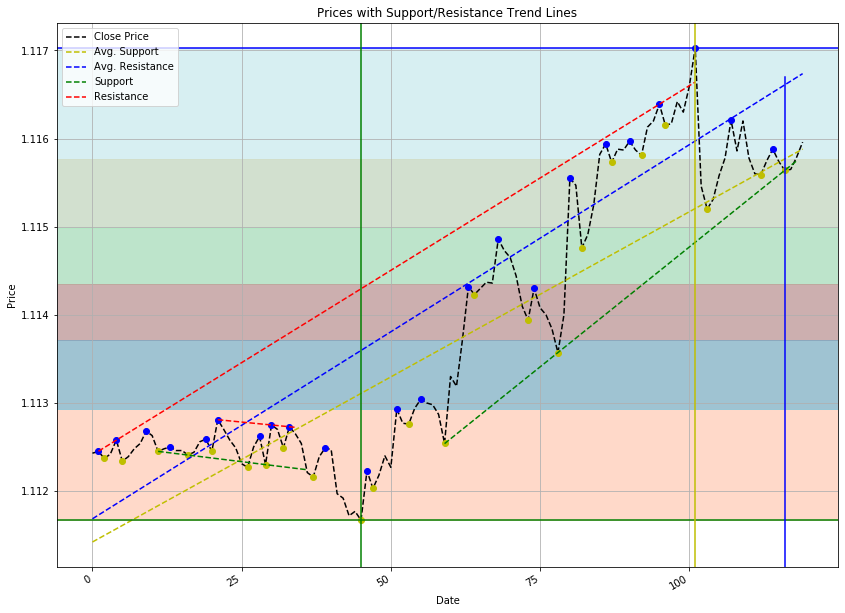

<Figure size 1008x720 with 0 Axes>

In [11]:
size=120
#big=len(data)-size
big=7446

hist=(data[big:big+size].Open, data[big:big+size].Close)
#min_h, max_h = min(min(hist[0]), min(hist[1])), max(max(hist[0]), max(hist[1]))
minimaIdxs, maximaIdxs = tr.get_extrema(data[big:big+size].Close,tr.METHOD_NUMDIFF,3)
min_fibo =10
min_ca   =0
max_fibo =0
max_ca   =0
for n in minimaIdxs:
    if min_fibo > hist[1][n]:
        min_fibo=hist[1][n]
        min_ca=n
for n in maximaIdxs:        
    if max_fibo < hist[1][n]:
        max_fibo=hist[1][n]
        max_ca=n

        
#fig = tr.plot_support_resistance((data[big:big+size].Open, data[big:big+size].Close), data[big:big+size].index) 
fig = tr.plot_support_resistance(data[big:big+size].Close, data[big:big+size].index) 

plt.rcParams['figure.figsize'] = [14, 10]
plt.savefig('suppres.svg', format='svg')

#for n in minimaIdxs:
#    plt.axvline(x=n, ymin=0, ymax=0.9,color = 'r')
#for n in maximaIdxs:
#    plt.axvline(x=n, ymin=0, ymax=0.9,color = 'b')
plt.axhline(y=min_fibo, xmin=0, xmax=1,color = 'g')
plt.axhline(y=max_fibo, xmin=0, xmax=1,color = 'b')

bzM=max(minimaIdxs)
bzX=max(maximaIdxs)
    
if (bzM > bzX):
    plt.axvline(x=bzM, ymin=0, ymax=0.9,color = 'b')
else:
    plt.axvline(x=bzX, ymin=0, ymax=0.9,color = 'r')

plt.axvline(x=min_ca, ymin=0, ymax=1,color = 'g')
plt.axvline(x=max_ca, ymin=0, ymax=1,color = 'y')


diff = max_fibo - min_fibo
level1 = max_fibo - 0.236 * diff
level2 = max_fibo - 0.382 * diff
level3 = max_fibo - 0.5 * diff
level4 = max_fibo - 0.618 * diff
level5 = max_fibo - 0.764 * diff



#ax = plt.subplots()
#ax.plot(df.Close, color='black')
ax = plt.gca()
ax.axhspan(level1, min_fibo, alpha=0.4, color='lightsalmon')
ax.axhspan(level2, level1, alpha=0.5, color='palegoldenrod')
ax.axhspan(level3, level2, alpha=0.5, color='palegreen')
ax.axhspan(level4, level3, alpha=0.5, color='#d62728')
ax.axhspan(level5, level4, alpha=0.5, color='#1f77b4')
ax.axhspan(max_fibo, level5, alpha=0.5, color='powderblue')

plt.grid()


plt.show()
plt.clf() #clear figure

In [ ]:
size=120
big=len(data)-size


fig = tr.plot_sup_res_date((data[big:big+size].Open, data[big:big+size].Close), data[big:big+size].index) 
plt.rcParams['figure.figsize'] = [14, 10]
plt.savefig('suppres.svg', format='svg')

plt.show()
plt.clf() #clear figure

In [ ]:
print(len(data))
data = data[:-2]
print(len(data))

In [24]:
aCalc=tr.calc_support_resistance((data[big:big+size].Open, data[big:big+size].Close)) 

In [25]:
len(aCalc)

2

In [26]:
FROM_LOW=0
FROM_HIGH=1

In [27]:
minimaIdxs, pmin, mintrend, minwindows = aCalc[FROM_LOW]
maximaIdxs, pmax, maxtrend, maxwindows = aCalc[FROM_HIGH]

In [ ]:
width = 12
height = 8
hist=(data[big:big+size].Open, data[big:big+size].Close)
fig=plt.figure(figsize=(width, height))
len_h = size
min_h, max_h = min(min(hist[0]), min(hist[1])), max(max(hist[0]), max(hist[1]))
disp = [(hist[0], minimaIdxs, pmin, 'yo', 'Avg. Support', 'y--'), (hist[1], maximaIdxs, pmax, 'bo', 'Avg. Resistance', 'b--')]
dispwin = [(hist[0], minwindows, 'Support', 'g--'), (hist[1], maxwindows, 'Resistance', 'r--')]
disptrend = [(hist[0], mintrend, 'Support', 'g--'), (hist[1], maxtrend, 'Resistance', 'r--')]
plt.plot(range(len_h), hist[0], 'k--', label='Low Price')
plt.plot(range(len_h), hist[1], 'm--', label='High Price')
plt.axvline(x=5, ymin=min_h, ymax=max_h)

plt.show()

In [34]:
hist[1].index.values[1]

numpy.datetime64('2019-10-21T13:15:00.000000000')

In [35]:
minimaIdxs, maximaIdxs = tr.get_extrema(data[big:big+size].Close,tr.METHOD_NUMDIFF,5)

In [ ]:
minimaIdxs

In [ ]:
data.iloc[big+minimaIdxs[0]]

In [ ]:
mins, maxs = tr.calc_support_resistance((data[big:big+size].Low, data[big:big+size].High))

In [ ]:
(minimaIdxs, pmin, mintrend, minwindows), (maximaIdxs, pmax, maxtrend, maxwindows) = mins, maxs

In [ ]:
data.iloc[big+minimaIdxs[0]]

In [ ]:
pmin

In [ ]:
len(mintrend)

In [ ]:
for x in mintrend:
    print(x)

In [21]:
minimaIdxs, maximaIdxs = tr.get_extrema(data[big:big+size].Close)

In [ ]:

fig = tr.plot_support_resistance(data[big:big+size].Close) # requires matplotlib - pip install matplotlib
#plt.pyplot.rcParams['figure.figsize'] = [10, 5]
plt.pyplot.savefig('suppres.svg', format='svg')
plt.pyplot.show()
plt.pyplot.clf() #clear figure

In [ ]:
big=1760
fig = tr.plot_sup_res_date((data[big:big+100].Low, data[big:big+100].High), data[big:big+100].index) #requires pandas
plt.pyplot.rcParams['figure.figsize'] = [10, 5]
plt.pyplot.savefig('suppres.svg', format='svg')
plt.pyplot.show()
plt.pyplot.clf() #clear figure

In [ ]:
len(data)

In [ ]:
len(hist[-200:])

In [ ]:
fig = tr.plot_sup_res_date( #automatic date formatter based on US trading calendar
	hist[-100:].Low, #as per h for calc_support_resistance
	hist[-100:].index, #date index from pandas
	numbest = 2,
	fromwindows = True,
	pctbound = 0.1,
	extmethod = tr.METHOD_NUMDIFF,
	method=tr.METHOD_NSQUREDLOGN,
	window=125,
	errpct = 0.005,
	hough_scale=0.01,
	hough_prob_iter=10,
	sortError=False,
	accuracy=1)

In [ ]:
hist.head()

In [ ]:
import pandas as pd

In [ ]:
data=pd.read_csv("data/EURUSD_M15.csv",names=["date","hour","Open","High","Low","Close"], index_col=False)
data["Date"]=pd.to_datetime(data['date'] + ' ' + data['hour'])
data=data.drop(['date', 'hour'], axis=1)
data=data.set_index("Date")

In [ ]:
data.head()

In [ ]:
data["2019-07-01 01:00:00":"2019-07-01 01:45:00"]

In [ ]:
mintrend[0]

In [ ]:
plt.pyplot.plot(mintrend[0][1])

In [ ]:
hist.head()

In [ ]:
tr.plot_sup_res_learn("./data",data)

In [20]:
for x in mintrend:
    print(x,)

([33, 37, 98, 104], (-5.790050205385419e-05, 1.1083872341396621, 4.846188954916167e-10, 2.3515216809580362e-07, 1.7783941432793195e-05, 8.793549368668607e-07))
([33, 98, 104], (-5.809933347667033e-05, 1.1084077811223392, 6.540528918702111e-11, 1.45237543530783e-07, 1.2297826943405675e-05, 1.2536730452249333e-06))
([12, 24, 83], (-5.129240710825406e-06, 1.1059167932148628, 6.8416801289989e-11, 1.538978908151935e-07, 7.750609075144826e-06, 1.884423801831736e-05))


In [29]:
METHOD_NAIVE, METHOD_NAIVECONSEC, METHOD_NUMDIFF = 0, 1, 2
METHOD_NCUBED, METHOD_NSQUREDLOGN, METHOD_HOUGHPOINTS, METHOD_HOUGHLINES, METHOD_PROBHOUGH = 0, 1, 2, 3, 4


In [30]:
def get_extrema(h, extmethod=METHOD_NUMDIFF, accuracy=1):
    #h must be single dimensional array-like object e.g. List, np.ndarray, pd.Series
    if type(h) is tuple and len(h) == 2 and (h[0] is None or check_num_alike(h[0])) and (h[1] is None or check_num_alike(h[1])) and (not h[0] is None or not h[1] is None):
        hmin, hmax = h[0], h[1]
        if not h[0] is None and not h[1] is None and len(hmin) != len(hmax): #not strict requirement, but contextually ideal
            raise ValueError('h does not have a equal length minima and maxima data')
    elif check_num_alike(h): hmin, hmax = None, None
    else: raise ValueError('h is not list, numpy ndarray or pandas Series of numeric values or a 2-tuple thereof')
    if extmethod == METHOD_NAIVE:
        #naive method
        import pandas as pd
        def get_minmax(h):
            rollwin = pd.Series(h).rolling(window=3, min_periods=1, center=True)
            minFunc = lambda x: len(x) == 3 and x.iloc[0] > x.iloc[1] and x.iloc[2] > x.iloc[1]
            maxFunc = lambda x: len(x) == 3 and x.iloc[0] < x.iloc[1] and x.iloc[2] < x.iloc[1]
            numdiff_extrema = lambda func: np.flatnonzero(rollwin.aggregate(func)).tolist()
            return minFunc, maxFunc, numdiff_extrema            
    elif extmethod == METHOD_NAIVECONSEC:
        #naive method collapsing duplicate consecutive values
        import pandas as pd
        def get_minmax(h):
            hist = pd.Series(h)
            rollwin = hist.loc[hist.shift(-1) != hist].rolling(window=3, center=True)
            minFunc = lambda x: x.iloc[0] > x.iloc[1] and x.iloc[2] > x.iloc[1]
            maxFunc = lambda x: x.iloc[0] < x.iloc[1] and x.iloc[2] < x.iloc[1]
            def numdiff_extrema(func):
                x = rollwin.aggregate(func)
                return x[x == 1].index.tolist()
            return minFunc, maxFunc, numdiff_extrema
    elif extmethod == METHOD_NUMDIFF:
        #pip install findiff
        from findiff import FinDiff
        dx = 1 #1 day interval
        d_dx = FinDiff(0, dx, 1, acc=accuracy) #acc=3 #for 5-point stencil, currenly uses +/-1 day only
        d2_dx2 = FinDiff(0, dx, 2, acc=accuracy) #acc=3 #for 5-point stencil, currenly uses +/-1 day only
        def get_minmax(h):
            clarr = np.asarray(h, dtype=np.float64)
            mom, momacc = d_dx(clarr), d2_dx2(clarr)
            #print(mom[-10:], momacc[-10:])
            #numerical derivative will yield prominent extrema points only
            def numdiff_extrema(func):
                return [x for x in range(len(mom))
                        if func(x) and
                            (mom[x] == 0 or #either slope is 0, or it crosses from positive to negative with the closer to 0 of the two chosen or prior if a tie
                             (x != len(mom) - 1 and (mom[x] > 0 and mom[x+1] < 0 and h[x] >= h[x+1] or #mom[x] >= -mom[x+1]
                                                     mom[x] < 0 and mom[x+1] > 0 and h[x] <= h[x+1]) or #-mom[x] >= mom[x+1]) or
                              x != 0 and (mom[x-1] > 0 and mom[x] < 0 and h[x-1] < h[x] or #mom[x-1] < -mom[x] or
                                          mom[x-1] < 0 and mom[x] > 0 and h[x-1] > h[x])))] #-mom[x-1] < mom[x])))]
            return lambda x: momacc[x] > 0, lambda x: momacc[x] < 0, numdiff_extrema
    else: raise ValueError('extmethod must be METHOD_NAIVE, METHOD_NAIVECONSEC, METHOD_NUMDIFF')
    if hmin is None and hmax is None:
        minFunc, maxFunc, numdiff_extrema = get_minmax(h)
        return numdiff_extrema(minFunc), numdiff_extrema(maxFunc)
    if not hmin is None:
        minf = get_minmax(hmin)
        if hmax is None: return minf[2](minf[0])
    if not hmax is None:
        maxf = get_minmax(hmax)
        if hmin is None: return maxf[2](maxf[1])
    return minf[2](minf[0]), maxf[2](maxf[1])

In [93]:
def datefmt(xdate, cal=None):
    from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday, nearest_workday, \
        USMartinLutherKingJr, USPresidentsDay, GoodFriday, USMemorialDay, \
        USLaborDay, USThanksgivingDay
    from pandas.tseries.offsets import CustomBusinessDay
    class USTradingCalendar(AbstractHolidayCalendar):
        rules = [
            Holiday('NewYearsDay', month=1, day=1, observance=nearest_workday),
            USMartinLutherKingJr,
            USPresidentsDay,
            GoodFriday,
            USMemorialDay,
            Holiday('USIndependenceDay', month=7, day=4, observance=nearest_workday),
            USLaborDay,
            USThanksgivingDay,
            Holiday('Christmas', month=12, day=25, observance=nearest_workday)
        ]
    if cal == None: cal = USTradingCalendar()
    def mydate(x,pos):
        #print((x,pos))
        val = int(x + 0.5)
        if val < 0: return (xdate[0].to_pydatetime() - CustomBusinessDay(-val, calendar=cal)).strftime('%Y-%m-%d')
        elif val >= len(xdate): return (xdate[-1].to_pydatetime() + CustomBusinessDay(val - len(xdate) + 1, calendar=cal)).strftime('%Y-%m-%d')
        else: return xdate[val].strftime('%Y-%m-%d')
    return mydate


In [90]:
def plot_sup_res_learn( hist):   
    #curdir = "./"
    import os
    curdir = os.getcwd()
    if not os.path.isdir(os.path.join(curdir, 'data')): os.mkdir(os.path.join(curdir, 'data')) #image folder
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    #for x in plt.get_fignums(): plt.close(plt.figure(x)) #clean up when crashes occur and figures left open
    #plt.get_backend(): 'TkAgg' is default
    #hist = hist[:'2019-10-07']
    def fig_slopeint():
        plt.clf()
        plt.rcParams.update({'font.size': 14})
        plt.gcf().set_size_inches(1000/plt.gcf().dpi, 1000/plt.gcf().dpi) #plt.gcf().dpi=100
        spec = gridspec.GridSpec(ncols=1, nrows=2, figure=plt.gcf(), height_ratios=[3, 1])
        plt.subplot(spec[1, 0])
        plt.axis('off')
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
        plt.annotate(r'Standard slope-intercept line equation: $f(x)=y=mx+b$' + '\n'
                           r'For 2 points $(x_0, y_0), (x_1, y_1)$:' + '\n' +
                           r'Slope derived from two points: $m=\frac{\Delta y}{\Delta x}=\frac{y_0-y_1}{x_0-x_1}$' + '\n' +
                           r'Intercept derived from slope and point: $b=y_0-mx_0=y_1-mx_1$' + '\n' +
                           r'Y-axis Distance to point from line: $d=\left|mx_2+b-y_2\right|$' + '\n' +
                           r'''Pythagorean's Theorem for Right Triangles: $c^2=a^2+b^2\equiv$ $d^2=\Delta x^2+\Delta y^2$''' + '\n' +
                           r'Distance between Points: d=$\sqrt{(x_1-x_0)^2+(y_1-y_0)^2}$', (0, 0))
        plt.subplot(spec[0, 0])
        m = (hist.Close.iloc[-3] - hist.Close.iloc[-1]) / -2
        b1, b2 = hist.Close.iloc[-1] - m * 2, hist.Close.iloc[-3] - m * 0
        d = abs(m * 1 + b1 - hist.Close.iloc[-2])
        dist = np.sqrt(np.square(hist.Close.iloc[-3] - hist.Close.iloc[-1]) + np.square(-2))
        height = hist.Close.iloc[-3:].max() - hist.Close.iloc[-3:].min()
        plt.plot(range(len(hist.Close)-3, len(hist.Close)), hist.Close.iloc[-3:])
        plt.yticks(hist.Close.iloc[-3:])
        plt.plot([len(hist.Close)-3, len(hist.Close)-1], [hist.Close.iloc[-3], hist.Close.iloc[-1]], 'g--')
        #perpendicular slope: 1/-m, intercept to midpoint b=y-mx: 
        #intcpt = (hist.Close.iloc[-3] + hist.Close.iloc[-1]) / 2 - (-1/m)

        ax = plt.gca()
        plt.ylim(ax.get_ylim()[0] - height * 0.1, ax.get_ylim()[1])
    #drawdim = plt.gcf().get_size_inches()*plt.gcf().dpi
        bbox = ax.get_window_extent()#.transformed(plt.gcf().dpi_scale_trans.inverted()) #convert pixels to points
        drawdim = [bbox.width, bbox.height]
        xaxwdt, yaxhgt = ax.get_xlim()[1] - ax.get_xlim()[0], ax.get_ylim()[1] - ax.get_ylim()[0]
        mvisual = (hist.Close.iloc[-3] - hist.Close.iloc[-1]) * drawdim[1] / yaxhgt / (-2 * drawdim[0] / xaxwdt) #scale is 2:yaxhgt, could use this in computations, but must do dynamically with event handler since draw scale changes
        #intcpt = (hist.Close.iloc[-3] - ax.get_ylim()[0]) * drawdim[1] / yaxhgt - mvisual * (0.1 * drawdim[0] / xaxwdt)
        #print((mvisual, intcpt, xaxwdt, yaxhgt, drawdim, ax.get_ylim()))
        #(len(hist.Close)-3, hist.Close.iloc[-3])
        #a = plt.annotate('', (0.1 * drawdim[0] / xaxwdt, mvisual * (0.1 * drawdim[0] / xaxwdt) + intcpt), (2.1 * drawdim[0] / xaxwdt, mvisual * (2.1 * drawdim[0] / xaxwdt) + intcpt), xycoords='axes pixels', textcoords='axes pixels', arrowprops={'arrowstyle':'-['})
        intcpt = ((hist.Close.iloc[-3] + hist.Close.iloc[-1]) / 2 - ax.get_ylim()[0]) * drawdim[1] / yaxhgt - (-(drawdim[0] / 2) / mvisual)
        ann = plt.annotate(r'$d=\sqrt{{({}-{})^2+({}-{})^2}}={}$'.format(hist.Close.iloc[-3], hist.Close.iloc[-1], 0, 2, round(dist, 2)), (len(hist.Close)-2, (hist.Close.iloc[-3] + hist.Close.iloc[-1]) / 2), ax.transData.inverted().transform(((drawdim[0] * 0.54)+bbox.x0, (-(drawdim[0] * 0.54)/mvisual + intcpt)+bbox.y0)), textcoords='data', color='green', ha='center', va='center', arrowprops={'arrowstyle':'-[', 'color':'green'})
    #print(drawdim, ann.xyann, mvisual, intcpt, ax.get_xlim())
        plt.annotate(r'$b={}-{}*{}={}-{}*{}={}$'.format(hist.Close.iloc[-1], round(m, 2), 2, hist.Close.iloc[-3], round(m, 2), 0, b1), (len(hist.Close)-3, hist.Close.iloc[-3]), (len(hist.Close)-3, hist.Close.iloc[-3] - height*0.1), arrowprops={'arrowstyle':'->'})
        plt.plot([len(hist.Close)-2, len(hist.Close)-2], [m * 1 + b1, hist.Close.iloc[-2]], 'r--')
        plt.annotate((r'$d=$' + '\n' + r'$\left|{}*{}+{}-{}\right|$' + '\n' + r'$={}$').format(round(m, 2), 1, b1, hist.Close.iloc[-2], round(d, 2)), (len(hist.Close)-2, (m * 1 + b1 + hist.Close.iloc[-2]) / 2), (len(hist.Close)-2+0.1, (m * 1 + b1 + hist.Close.iloc[-2]) / 2), va='center', color='red', arrowprops={'arrowstyle':'-[', 'color':'red'})
        plt.annotate(r'$m=\frac{{{}}}{{{}}}={}$'.format(round(hist.Close.iloc[-3] - hist.Close.iloc[-1], 2), 0 - 2, round(m, 2)), (len(hist.Close)-2, (hist.Close.iloc[-3] + hist.Close.iloc[-1]) / 2), (len(hist.Close)-2+0.2, (hist.Close.iloc[-3] + hist.Close.iloc[-1]) / 2 - height * 0.1), color='black', arrowprops={'arrowstyle':'->'})
        plt.plot([len(hist.Close)-3, len(hist.Close)-1], [hist.Close.iloc[-3], hist.Close.iloc[-3]], 'c--')
        plt.annotate(r'$\Delta x={}-{}={}$'.format(0, 2, 0 - 2), (len(hist.Close)-2, hist.Close.iloc[-3]), (len(hist.Close)-2, hist.Close.iloc[-3] + height * 0.10), color='cyan', ha='center', va='center', arrowprops={'arrowstyle':'-[', 'color':'cyan'})
        plt.plot([len(hist.Close)-1, len(hist.Close)-1], [hist.Close.iloc[-3], hist.Close.iloc[-1]], 'c--')
        plt.annotate(r'$\Delta y={}-{}={}$'.format(hist.Close.iloc[-3], hist.Close.iloc[-1], round(hist.Close.iloc[-3] - hist.Close.iloc[-1], 2)), (len(hist.Close)-1, (hist.Close.iloc[-3] + hist.Close.iloc[-1]) / 2), (len(hist.Close)-2+0.5, (hist.Close.iloc[-3] + hist.Close.iloc[-1]) / 2), color='cyan', ha='center', va='center', arrowprops={'arrowstyle':'-[', 'color':'cyan'})

        plt.title('Closing Price Points Demonstrating Line Calculations')
        plt.xlabel('Date')
        plt.ylabel('Price')
        ax.xaxis.set_major_locator(ticker.IndexLocator(1, 0))
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(datefmt(hist.index)))
        plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
    #plt.axis('equal')
        def redraw(event):
        #cxaxwdt, cyaxhgt = ax.get_xlim()[1] - ax.get_xlim()[0], ax.get_ylim()[1] - ax.get_ylim()[0]
            bbox = ax.get_window_extent()#.transformed(plt.gcf().dpi_scale_trans.inverted())
            drawdim = [bbox.width, bbox.height]
            mvisual = (hist.Close.iloc[-3] - hist.Close.iloc[-1]) * drawdim[1] / yaxhgt / (-2 * drawdim[0] / xaxwdt)
            intcpt = ((hist.Close.iloc[-3] + hist.Close.iloc[-1]) / 2 - ax.get_ylim()[0]) * drawdim[1] / yaxhgt - (-(drawdim[0] / 2) / mvisual)
        #print(drawdim, ann.xyann, mvisual, intcpt, ax.get_xlim())
            ann.xyann = ax.transData.inverted().transform(((drawdim[0] * 0.54)+bbox.x0, (-(drawdim[0] * 0.54)/mvisual + intcpt)+bbox.y0))
            plt.gcf().canvas.draw_idle()
    #idx = ax.callbacks.connect('xlim_changed', redraw)
    #idy = ax.callbacks.connect('ylim_changed', redraw)
        cid = plt.gcf().canvas.mpl_connect('resize_event', redraw)
        plt.tight_layout()
    #plt.gcf().canvas.draw()
    #redraw(None)
    #plt.gcf().canvas.draw()
    #extent = plt.gcf().get_window_extent(renderer=plt.gcf().canvas.get_renderer()).transformed(plt.gcf().dpi_scale_trans.inverted())
        plt.savefig(os.path.join(curdir, 'data', 'slopeint.svg'), format='svg')#, bbox_inches = extent, pad_inches = 0)
        plt.savefig(os.path.join(curdir, 'data', 'slopeint.png'), format='png')#, bbox_inches = extent, pad_inches = 0)
    #plt.show()
        plt.gcf().canvas.mpl_disconnect(cid)
    #ax.callbacks.disconnect(idx)
    #ax.callbacks.disconnect(idy)
    import matplotlib.gridspec as gridspec
    import matplotlib.patches as mpatches
    sz = plt.gcf().get_size_inches()

    fig_slopeint()

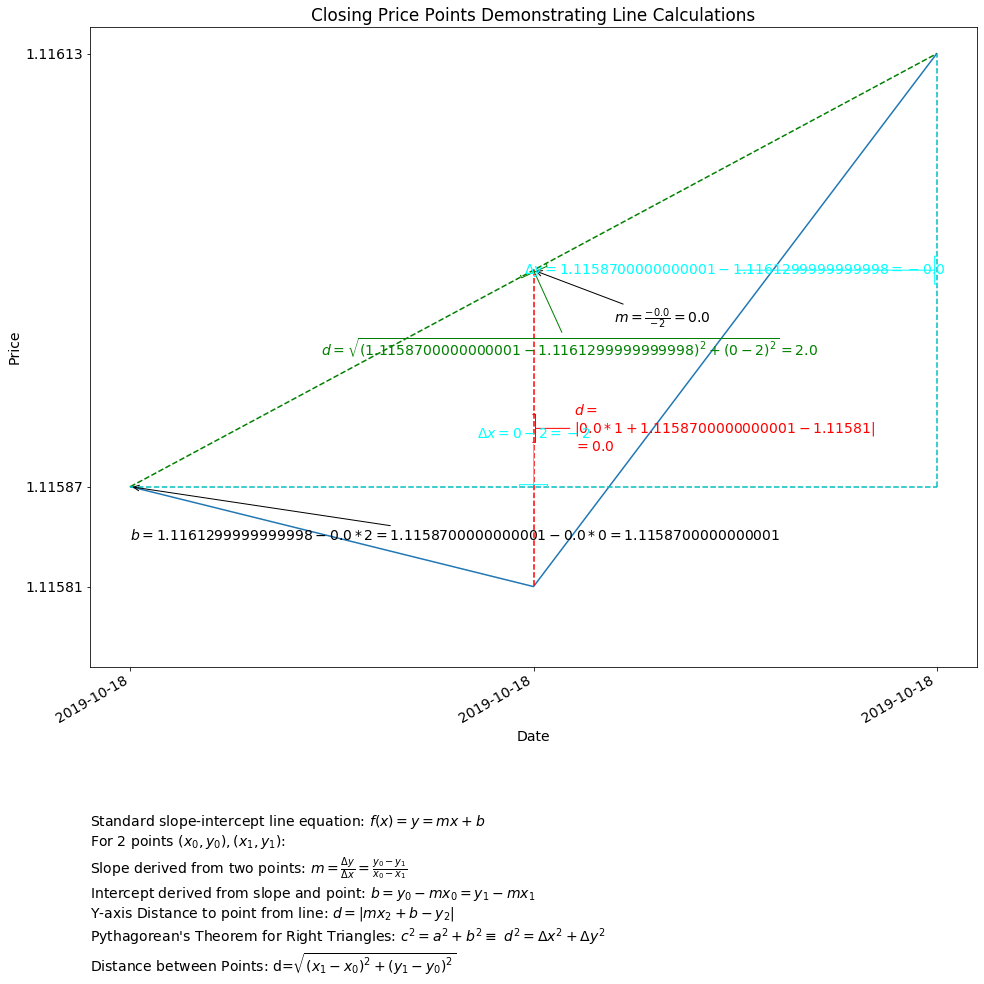

In [94]:
plot_sup_res_learn(data[big:big+100])

In [96]:
def plot_sup_res_lin( hist):   
    #curdir = "./"
    import os
    curdir = os.getcwd()
    if not os.path.isdir(os.path.join(curdir, 'data')): os.mkdir(os.path.join(curdir, 'data')) #image folder
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    #for x in plt.get_fignums(): plt.close(plt.figure(x)) #clean up when crashes occur and figures left open
    #plt.get_backend(): 'TkAgg' is default
    #hist = hist[:'2019-10-07']

    
    def fig_linregrs():
        plt.clf()
        plt.rcParams.update({'font.size': 14})
        plt.gcf().set_size_inches(1024/plt.gcf().dpi, 768/plt.gcf().dpi) #plt.gcf().dpi=100
        spec = gridspec.GridSpec(ncols=1, nrows=2, figure=plt.gcf(), height_ratios=[3, 1])
        plt.subplot(spec[1, 0])
        plt.axis('off')
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
        plt.annotate(r'Mean of n-Points along x and y-axes: $\bar{x}=\frac{\sum_{i=1}^n{x_i}}{n}, \bar{y}=\frac{\sum_{i=1}^n{y_i}}{n}$' + '\n' +
                           r'Regression slope: $m=\frac{\sum_{i=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^n(x_i-\bar{x})^2}$' + '  ' +
                           r'Regression intercept: $b=\bar{y}-m\bar{x}$' + '\n' +
                           r'Sum of Squared Residuals for expected $y_i$ $(\hat{y}_i)$: $SSR=\sum_{i=1}^n{(y_i-\hat{y}_i)^2}$' + '\n' +
                           r'Standard Error of Slope: $\sigma_m=\sqrt{\frac{SSR}{(n-2)\sum_{i=1}^n{(x_i-\bar{x})^2}}}$' + '  ' + 
                           r'Standard Error of Intercept: $\sigma_b=\sigma_m\sqrt{\frac{\sum_{i=1}^nx_i^2}{n}}$', (0, 0))
        plt.subplot(spec[0, 0])
        plt.plot(range(len(hist.Close)-3, len(hist.Close)), hist.Close.iloc[-3:], 'bo')
        xbar, ybar = (0 + 1 + 2) / 3, (hist.Close.iloc[-3] + hist.Close.iloc[-2] + hist.Close.iloc[-1]) / 3
        height = hist.Close.iloc[-3:].max() - hist.Close.iloc[-3:].min()
        plt.hlines(ybar, len(hist.Close)-3, len(hist.Close)-1, colors='r', linestyles='--')
        plt.annotate(r'$\bar{{x}}=\frac{{{}+{}+{}}}{{{}}}={}$'.format(0, 1, 2, 3, 1), (xbar + len(hist.Close)-3, (hist.Close.iloc[-3:].min() + hist.Close.iloc[-3:].max()) / 2), (xbar + len(hist.Close)-3, hist.Close.iloc[-3:].min()), color='red', va='center', arrowprops={'arrowstyle':'->', 'color':'red'})
        plt.vlines(xbar + len(hist.Close)-3, hist.Close.iloc[-3:].min(), hist.Close.iloc[-3:].max(), colors='r', linestyles='--')
        plt.annotate(r'$\bar{{y}}=\frac{{{}+{}+{}}}{{{}}}={}$'.format(hist.Close.iloc[-3], hist.Close.iloc[-2], hist.Close.iloc[-1], 3, round(ybar, 2)), (len(hist.Close)-2, ybar), (len(hist.Close)-1, ybar - height * 0.1), color='red', va='top', ha='right', arrowprops={'arrowstyle':'->', 'color':'red'})
        m = ((0 - xbar) * (hist.Close.iloc[-3] - ybar) + (1 - xbar) * (hist.Close.iloc[-2] - ybar) + (2 - xbar) * (hist.Close.iloc[-1] - ybar)) / (np.square(0-xbar)+np.square(1-xbar)+np.square(2-xbar))
        b = ybar - m * xbar
        SSR = np.square(hist.Close.iloc[-3] - (m * 0 + b)) + np.square(hist.Close.iloc[-2] - (m * 1 + b)) + np.square(hist.Close.iloc[-1] - (m * 2 + b))
        err1 = np.sqrt(SSR / ((3 - 2) * (np.square(0-xbar)+np.square(1-xbar)+np.square(2-xbar))))
        err2 = err1*np.sqrt((np.square(0)+np.square(1)+np.square(2))/3)
        plt.annotate(r'$\hat{{y}}_0={}*{}+{}={}$'.format(round(m, 2), 0, round(b, 2), round(m*0+b, 2)), (len(hist.Close) - 3, m*0+b), (len(hist.Close) - 3 + 0.1, m*0+b), va='top', arrowprops={'arrowstyle':'->'})
        plt.annotate(r'$\hat{{y}}_1={}*{}+{}={}$'.format(round(m, 2), 1, round(b, 2), round(m*1+b, 2)), (len(hist.Close) - 2, m*1+b), (len(hist.Close) - 2 + 0.15, m*1+b+height*0.01), arrowprops={'arrowstyle':'->'})
        plt.annotate(r'$\hat{{y}}_2={}*{}+{}={}$'.format(round(m, 2), 2, round(b, 2), round(m*2+b, 2)), (len(hist.Close) - 1, m*2+b), (len(hist.Close) - 1 - 0.1, m*2+b+height*0.1), ha='right', arrowprops={'arrowstyle':'->'})
        plt.plot([len(hist.Close) - 3, len(hist.Close) - 3], [hist.Close.iloc[-3], ybar], color='green')
        plt.plot([len(hist.Close) - 2, len(hist.Close) - 2], [hist.Close.iloc[-2], ybar], color='green')
        plt.plot([len(hist.Close) - 1, len(hist.Close) - 1], [hist.Close.iloc[-1], ybar], color='green')
        plt.annotate(r'$y_0-\bar{{y}}={}$'.format(round(hist.Close.iloc[-3] - ybar, 2)), (len(hist.Close) - 3, (hist.Close.iloc[-3] + ybar) / 2 + height * 0.1), (len(hist.Close) - 3 + 0.1, (hist.Close.iloc[-3] + ybar) / 2 + height * 0.1), color='green', va='center', arrowprops={'arrowstyle':'-[', 'color':'green'})
        plt.annotate(r'$y_1-\bar{{y}}={}$'.format(round(hist.Close.iloc[-2] - ybar, 2)), (len(hist.Close) - 2, (hist.Close.iloc[-2] + ybar) / 2 + height * 0.1), (len(hist.Close) - 2 + 0.1, (hist.Close.iloc[-2] + ybar) / 2 + height * 0.1), color='green', va='center', arrowprops={'arrowstyle':'-[', 'color':'green'})
        plt.annotate(r'$y_2-\bar{{y}}={}$'.format(round(hist.Close.iloc[-1] - ybar, 2)), (len(hist.Close) - 1, (hist.Close.iloc[-1] + ybar) / 2), (len(hist.Close) - 1 - 0.1, (hist.Close.iloc[-1] + ybar) / 2), color='green', va='center', ha='right', arrowprops={'arrowstyle':'-[', 'color':'green'})
        plt.plot([len(hist.Close) - 3, len(hist.Close) - 3], [hist.Close.iloc[-3], m*0+b], color='cyan')
        plt.plot([len(hist.Close) - 2, len(hist.Close) - 2], [hist.Close.iloc[-2], m*1+b], color='cyan')
        plt.plot([len(hist.Close) - 1, len(hist.Close) - 1], [hist.Close.iloc[-1], m*2+b], color='cyan')
        plt.annotate(r'$y_0-\hat{{y}}={}$'.format(round(hist.Close.iloc[-3] - (m*0+b), 2)), (len(hist.Close) - 3, (hist.Close.iloc[-3] + m*0+b) / 2), (len(hist.Close) - 3 + 0.1, (hist.Close.iloc[-3] + m*0+b) / 2), color='cyan', va='center', arrowprops={'arrowstyle':'-[', 'color':'cyan'})
        plt.annotate(r'$y_1-\hat{{y}}={}$'.format(round(hist.Close.iloc[-2] - (m*1+b), 2)), (len(hist.Close) - 2, (hist.Close.iloc[-2] + m*1+b) / 2), (len(hist.Close) - 2 + 0.1, (hist.Close.iloc[-2] + m*1+b) / 2), color='cyan', va='center', arrowprops={'arrowstyle':'-[', 'color':'cyan'})
        plt.annotate(r'$y_2-\hat{{y}}={}$'.format(round(hist.Close.iloc[-1] - (m*2+b), 2)), (len(hist.Close) - 1, (hist.Close.iloc[-1] + m*2+b) / 2 - height * 0.05), (len(hist.Close) - 1 - 0.1, (hist.Close.iloc[-1] + m*2+b) / 2 - height * 0.05), color='cyan', va='center', ha='right', arrowprops={'arrowstyle':'-[', 'color':'cyan'})
        plt.annotate((r'$m=\frac{{({}-{})*{}+({}-{})*{}+({}-{})*{}}}{{({}-{})^2+({}-{})^2+({}-{})^2}}$' + '\n' + '=${}$' + '\n' +
                     r'$SSR={}^2+{}^2+{}^2={}$' + '\n' +
                     r'$\sigma_m=\sqrt{{\frac{{{}}}{{({}-2)(({}-{})^2+({}-{})^2+({}-{})^2)}}}}={}$' + '\n' +
                     r'$\sigma_b={}\sqrt{{\frac{{{}^2+{}^2+{}^2}}{{{}}}}}={}$'
                     ).format(0, round(xbar, 2), round(hist.Close.iloc[-3] - ybar, 2), 1, round(xbar, 2), round(hist.Close.iloc[-2] - ybar, 2), 2, round(xbar, 2), round(hist.Close.iloc[-1] - ybar, 2), 0, round(xbar, 2), 1, round(xbar, 2), 2, round(xbar, 2), round(m, 2),
                             round(hist.Close.iloc[-3] - (m*0+b), 2), round(hist.Close.iloc[-2] - (m*1+b), 2), round(hist.Close.iloc[-1] - (m*2+b), 2), round(SSR, 2),
                             round(SSR, 2), 3, 0, round(xbar, 2), 1, round(xbar, 2), 2, round(xbar, 2), round(err1, 2),
                             round(err1, 2), 0, 1, 2, 3, round(err2, 2)),
                     (len(hist.Close)-2, m * 1 + b), (len(hist.Close)-1, hist.Close.iloc[-3:].min()), color='blue', va='bottom', ha='right', arrowprops={'arrowstyle':'->', 'color':'blue'})
        plt.annotate(r'$b={}-{}*{}={}$'.format(round(ybar, 2), round(m, 2), xbar, round(b, 2)), (len(hist.Close)-3, b), (len(hist.Close)-3+0.1, b), color='blue', ha='left', arrowprops={'arrowstyle':'->', 'color':'blue'})
        plt.plot([len(hist.Close)-3, len(hist.Close)-1], [b, 2 * m + b])
        ax = plt.gca()
        plt.yticks(hist.Close.iloc[-3:])
        plt.title('Closing Price Points Demonstrating Linear Regression')
        plt.xlabel('Date')
        plt.ylabel('Price')
        ax.xaxis.set_major_locator(ticker.IndexLocator(1, 0))
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(datefmt(hist.index)))
        plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
        plt.tight_layout()
    #extent = plt.gcf().get_window_extent(renderer=plt.gcf().canvas.get_renderer()).transformed(plt.gcf().dpi_scale_trans.inverted())
        plt.savefig(os.path.join(curdir, 'data', 'linregrs.svg'), format='svg')#, bbox_inches = extent, pad_inches = 0)
        plt.savefig(os.path.join(curdir, 'data', 'linregrs.png'), format='png')#, bbox_inches = extent, pad_inches = 0)
    #plt.show()
    import matplotlib.gridspec as gridspec
    import matplotlib.patches as mpatches
    sz = plt.gcf().get_size_inches()

    fig_linregrs()

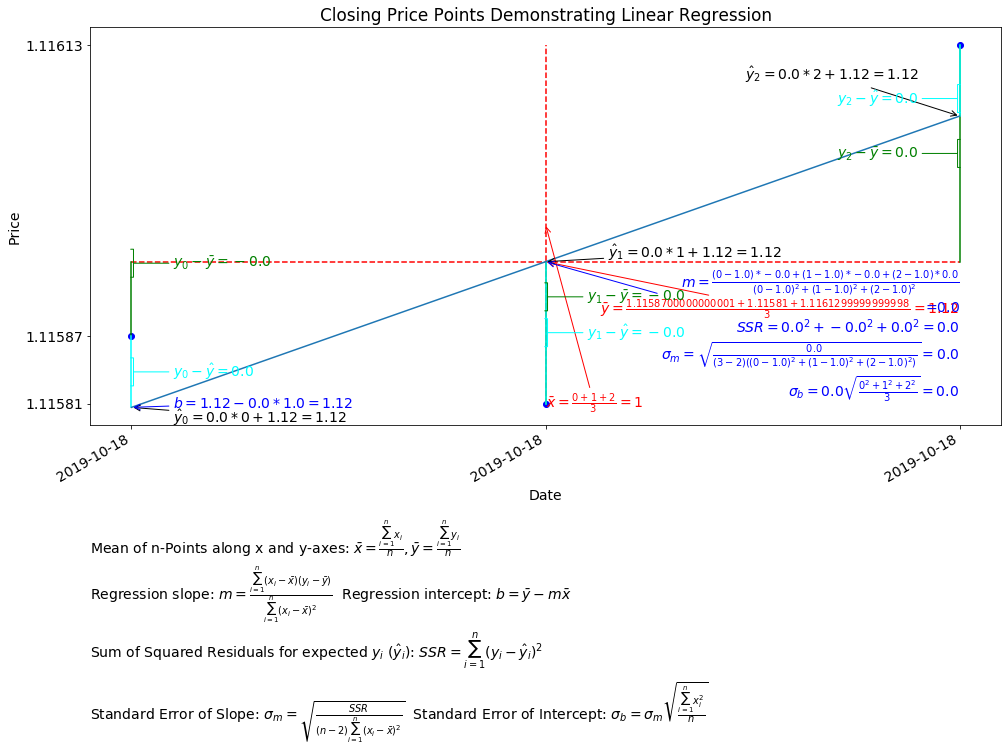

In [100]:
plot_sup_res_lin(data[big:big+100])

In [99]:
def plot_sup_res_ho( hist):   
    #curdir = "./"
    import os
    curdir = os.getcwd()
    if not os.path.isdir(os.path.join(curdir, 'data')): os.mkdir(os.path.join(curdir, 'data')) #image folder
    import pandas as pd
    import matplotlib.pyplot as plt
    import matplotlib.ticker as ticker
    #for x in plt.get_fignums(): plt.close(plt.figure(x)) #clean up when crashes occur and figures left open
    #plt.get_backend(): 'TkAgg' is default
    #hist = hist[:'2019-10-07']

    def fig_hough():
        plt.clf()
        plt.rcParams.update({'font.size': 14})
        plt.gcf().set_size_inches(1280/plt.gcf().dpi, 1024/plt.gcf().dpi) #plt.gcf().dpi=100
        spec = gridspec.GridSpec(ncols=1, nrows=2, figure=plt.gcf(), height_ratios=[3, 1])
        plt.subplot(spec[1, 0])
        plt.axis('off')
        plt.gca().get_xaxis().set_visible(False)
        plt.gca().get_yaxis().set_visible(False)
        plt.annotate(r'Slope of Perpendicular Line: $m_p=-\frac{1}{m}, mm_p=-1$' + '\n' +
                           r'Perpencicular Line passing through Point: $y=\frac{x_0-x}{m}+y_0$' + '\n' +
                           r'Point $(x\prime, y\prime)$ of Intersection of Lines: $mx+b=\frac{x_0-x}{m}+y_0\equiv x\prime=\frac{x_0+my_0-mb}{m^2+1}, y\prime=mx\prime+b$' + '\n' +
                           r'Distance of Point to Line after simplification: $d=\frac{\left|b+mx_0-y_0\right|}{\sqrt{1 + m^2}}$' + '\n' +
                           r'$\rho=x \cos \theta+y \sin \theta$ where $\sin \theta=\frac{opposite}{hypotenuse}, \cos \theta=\frac{adjacent}{hypotenuse}$ and $y=\frac{\sin \theta}{\cos \theta}x$ while its perpendicular line is $y=-\frac{\cos \theta}{\sin \theta}x+\frac{\rho}{\sin \theta}$', (0, 0))
        plt.subplot(spec[0, 0])
        plt.plot([len(hist.Close)-10, len(hist.Close)-1], [hist.Close.iloc[-10], hist.Close.iloc[-1]], 'ro')
        plt.plot([len(hist.Close)-10, len(hist.Close)-1], [hist.Close.iloc[-10], hist.Close.iloc[-1]], 'k-')
        mn, mx = min(hist.Close.iloc[-10], hist.Close.iloc[-1]), max(hist.Close.iloc[-10], hist.Close.iloc[-1])
        plt.plot([len(hist.Close)-10, len(hist.Close)-1], [mn, mx], 'b--')
        plt.annotate(r'Diagonal length=$\sqrt{{{}^2+{}^2}}={}$'.format(9, round(mx-mn, 2), round(np.sqrt(np.square(9)+np.square(mx-mn)), 2)), (len(hist.Close)-1, mx), (len(hist.Close)-1-1, mx), ha='right', va='top', color='blue', arrowprops={'arrowstyle':'->', 'color':'blue'})
        #plt.xlim(0, 30)
        #plt.ylim(0, 30)
        #plt.gca().add_line(plt.Line2D([0, 30], [30, 0]))
        #height = hist.Close.iloc[-10:].max() - hist.Close.iloc[-10:].min()
        ax = plt.gca()
    #plt.ylim(ax.get_ylim()[0] - height * 0.2, ax.get_ylim()[1])
    #plt.xlim(ax.get_xlim()[0] - 4, ax.get_xlim()[1])
        m = (hist.Close.iloc[-10] - hist.Close.iloc[-1]) / (0 - 9)
        b = hist.Close.iloc[-10] - m * 0 - mn #+ height * 0.2
        plt.annotate(r'$y={}x+{}$'.format(round(m, 2), round(b, 2)), (len(hist.Close)-5.5, (mn+mx)/2), (len(hist.Close)-5.5, mn+(mx-mn)*0.7), arrowprops={'arrowstyle':'->'})
        #axes origin is (len(hist.Close)-10, hist.Close.iloc[-10:].min()-height*0.2)
        bperp = 0 #hist.Close.iloc[-10:].min() - (-1/m * 0)
        #y0=mx0+b, y0=-x0/m+bperp, mx0+b=-x0/m+bperp, m^2x0+m(b-bperp)=-x0, x0(m^2+1)=m(bperp-b), x0=m(bperp-b)/(m^2+1) =(bperp-b)/(m-(-1/m))=(bperb-b)/((m^2+1)/m)
        x0 = (m * (bperp - b)) / (m*m+1)
        angle = np.arctan((-x0/m+bperp) / (x0))
    #print((angle * 180 / np.pi, height, m, b, -1/m, bperp, x0, -x0/m+bperp, x0*m+b, np.abs(b)/np.sqrt(1+m*m)))
        plt.annotate('', (len(hist.Close)-10, mn), (len(hist.Close)-10 + x0, mn + -x0/m + bperp), arrowprops=dict(arrowstyle="<|-", color='red'))
        plt.gca().add_patch(mpatches.Wedge((len(hist.Close)-10 + x0, mn + -x0/m + bperp), 1, angle * 180 / np.pi - 180, angle * 180 / np.pi - 90, fill=False))
        plt.gca().add_patch(mpatches.Wedge((len(hist.Close)-10 + x0, mn + -x0/m + bperp), 0.5, angle * 180 / np.pi - 270, angle * 180 / np.pi - 180, fill=False))
        plt.annotate(r'$90\circ$', (len(hist.Close)-10 + x0 - 1, mn + -x0/m + bperp - 2))
        plt.annotate(r'$90\circ$', (len(hist.Close)-10 + x0 - 1, mn + -x0/m + bperp + 1))
        plt.gca().add_patch(mpatches.Wedge((len(hist.Close)-10, mn), 3, 0, angle * 180 / np.pi, fill=False))
        plt.annotate(r'$\theta={}^\circ$'.format(round(angle * 180/np.pi, 2)), (len(hist.Close) - 6.75, mn+0.1))
        plt.gca().add_patch(mpatches.Wedge((len(hist.Close)-10, mx), 3, 270, 270 + angle * 180 / np.pi, fill=False))
        plt.annotate(r'$\theta$', (len(hist.Close)-9.5, mx-5))
        plt.annotate((r'$\rho=\frac{{\left|{}+{}*{}-{}\right|}}{{\sqrt{{1 + {}^2}}}}$' + '\n' + '$={}\cos {}+{}\sin {}$' + '\n' + '$={}\cos {}+{}\sin {}$' + '\n' + '$={}$').format(
            round(b, 2), round(m, 2), 0, 0, round(m, 2),
            0, round(angle*180/np.pi, 2), round(hist.Close.iloc[-10]-mn, 2), round(angle*180/np.pi, 2), 9, round(angle*180/np.pi, 2), hist.Close.iloc[-1]-mn, round(angle*180/np.pi, 2), round(0 * np.cos(angle) + (hist.Close.iloc[-10]-mn) * np.sin(angle), 2)),
                     (len(hist.Close)-10+x0/2, mn + (-x0/m + bperp) / 2), (len(hist.Close)-10+x0/2, mn + (-x0/m + bperp) / 2+0.9), ha='center', color='red', arrowprops=dict(arrowstyle="->", color='red'))
        plt.plot([len(hist.Close)-10, len(hist.Close)-1], [mn, mn], 'k-')
        plt.plot([len(hist.Close)-10, len(hist.Close)-10], [mn, mx], 'k-')
        plt.annotate('{}'.format(9), (len(hist.Close)-5.5, mn), (len(hist.Close)-5.5, mn+0.5), ha='center', arrowprops=dict(arrowstyle="->"))
        plt.annotate('{}'.format(round(mx-mn, 2)), (len(hist.Close)-10, (mn+mx)/2), (len(hist.Close)-10+0.5, (mn+mx)/2), ha='left', arrowprops=dict(arrowstyle="->"))
        plt.yticks([hist.Close.iloc[-10], hist.Close.iloc[-1]])
        plt.title('Closing Price Points Demonstrating Hough transform accumulation of rho-theta for 2 point line')
        plt.xlabel('Date')
        plt.ylabel('Price')
        ax.xaxis.set_major_locator(ticker.IndexLocator(1, 0))
    #ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        ax.xaxis.set_major_formatter(ticker.FuncFormatter(datefmt(hist.index)))
        plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
        plt.tight_layout()

    #extent = ann.get_window_extent(renderer=plt.gcf().canvas.get_renderer()).transformed(plt.gcf().dpi_scale_trans.inverted())
        plt.savefig(os.path.join(curdir, 'data', 'hough.svg'), format='svg')#, bbox_inches = extent, pad_inches = 0)
        plt.savefig(os.path.join(curdir, 'data', 'hough.png'), format='png')#, bbox_inches = extent, pad_inches = 0)

    
    import matplotlib.gridspec as gridspec
    import matplotlib.patches as mpatches
    sz = plt.gcf().get_size_inches()

    fig_hough()

/Users/milan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in double_scalars


ValueError: cannot convert float NaN to integer

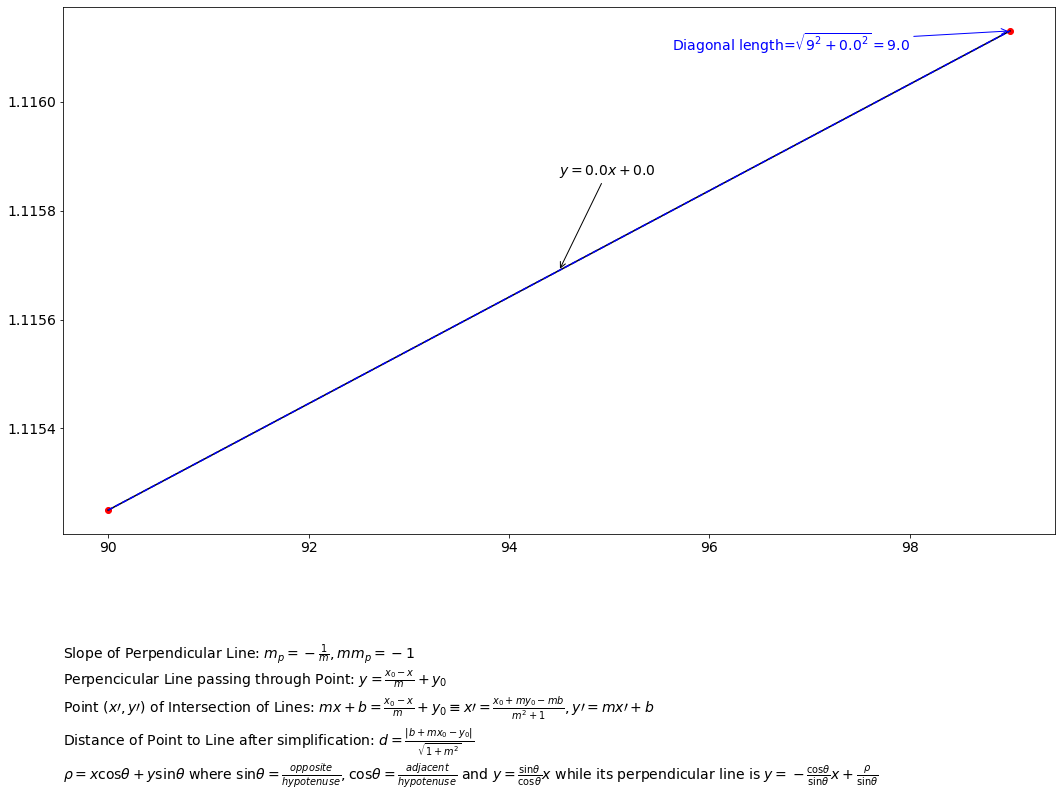

In [101]:
plot_sup_res_ho(data[big:big+100])